## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'
import tenserflow as tf
print(tf.__version__)

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 731s 9us/step


In [7]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [10]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
from tensorflow.keras.layers import MaxPooling2D

In [15]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [24]:
training_set

In [25]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/50
13/13 [==============================] - 39s 3s/step - loss: 1.2458 - accuracy: 0.5120 - val_loss: 0.7429 - val_accuracy: 0.4104
Epoch 2/50
13/13 [==============================] - 37s 3s/step - loss: 0.5724 - accuracy: 0.7043 - val_loss: 0.8196 - val_accuracy: 0.3507
Epoch 3/50
13/13 [==============================] - 31s 2s/step - loss: 0.4433 - accuracy: 0.7788 - val_loss: 0.9435 - val_accuracy: 0.4403
Epoch 4/50
13/13 [==============================] - 34s 3s/step - loss: 0.3890 - accuracy: 0.8293 - val_loss: 0.5527 - val_accuracy: 0.6418
Epoch 5/50
13/13 [==============================] - 37s 3s/step - loss: 0.3324 - accuracy: 0.8654 - val_loss: 0.6916 - val_accuracy: 0.6045
Epoch 6/50
13/13 [==============================] - 38s 3s/step - loss: 0.2878 - accuracy: 0.8894 - val_loss: 0.5063 - val_accuracy: 

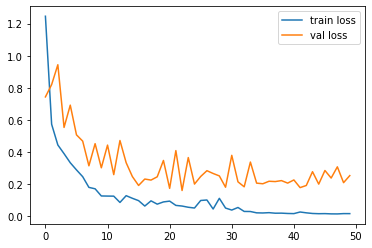

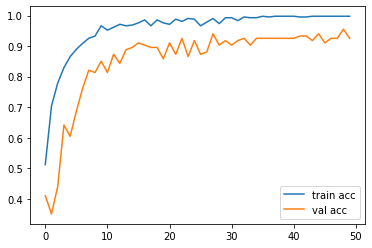

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [30]:

y_pred = model.predict(test_set)


In [31]:
y_pred

array([[1.0000000e+00, 1.2410789e-14],
       [1.0000000e+00, 1.6414535e-16],
       [1.0000000e+00, 1.7635665e-09],
       [1.0000000e+00, 9.8624227e-20],
       [3.4514859e-01, 6.5485144e-01],
       [2.5837536e-03, 9.9741626e-01],
       [1.0068595e-03, 9.9899310e-01],
       [1.8838699e-03, 9.9811614e-01],
       [1.0000000e+00, 2.3484982e-28],
       [8.8176494e-03, 9.9118233e-01],
       [1.5644224e-03, 9.9843556e-01],
       [1.0000000e+00, 0.0000000e+00],
       [3.1231433e-01, 6.8768561e-01],
       [2.0249623e-03, 9.9797505e-01],
       [1.0000000e+00, 2.9545558e-13],
       [4.1283408e-04, 9.9958712e-01],
       [7.3159790e-01, 2.6840210e-01],
       [1.0000000e+00, 2.2995771e-08],
       [9.9999988e-01, 6.2304608e-08],
       [2.3666620e-03, 9.9763334e-01],
       [1.0000000e+00, 1.4247923e-09],
       [2.6946096e-02, 9.7305387e-01],
       [9.7002012e-01, 2.9979913e-02],
       [1.0000000e+00, 4.9464033e-09],
       [1.0000000e+00, 6.8410212e-12],
       [4.1452888e-03, 9.

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [33]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0])

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('model_vgg19.h5')

In [36]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [37]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [40]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

In [43]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
